In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import geopandas as gpd
import math
from geopy.geocoders import Nominatim
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [35]:
gold = pd.read_csv('gold ore 2023-2010.csv')

In [20]:
gold.dtypes

Date      datetime64[ns]
Price             object
Open              object
High              object
Low               object
Volume            object
Chg%              object
dtype: object

In [ ]:
df['column_name'] = df['column_name'].str.replace('a', '')

In [46]:
# df['Volume'] = df['Volume'].str.replace('K', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Open'] = df['Open'].str.replace(',', '')
df['High'] = df['High'].str.replace(',', '')
df['Low'] = df['Low'].str.replace(',', '')

In [42]:
df['Volume'] = df['Volume'].apply(lambda x: x * 1000)

In [49]:
df

,Date,Price,Open,High,Low,Volume,Chg%
0,2023-03-03,1854.6,1842.1,1864.4,1842.0,0.0,0.77%
1,2023-03-02,1840.5,1843.8,1845.3,1835.9,0.0,-0.27%
2,2023-03-01,1845.4,1834.0,1852.5,1829.6,182580.0,0.47%
3,2023-02-28,1836.7,1823.9,1838.6,1810.8,184510.0,0.65%
4,2023-02-27,1824.9,1818.0,1827.3,1812.0,130430.0,0.35%
...,...,...,...,...,...,...,...
3191,2010-10-29,1357.6,1344.5,1359.8,1335.2,167820.0,1.12%
3192,2010-10-28,1342.5,1325.3,1346.2,1322.9,148660.0,1.50%
3193,2010-10-27,1322.6,1340.4,1343.7,1318.6,160010.0,-1.20%
3194,2010-10-26,1338.6,1340.3,1343.8,1328.1,156540.0,-0.02%


In [48]:
df['Price'] = df['Price'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
# df['Volume'] = df['Volume'].astype(float)

In [7]:
dates= gold['Date']

In [36]:
gold['Date'] = pd.to_datetime(gold['Date'], format='%b %d, %Y')


In [ ]:
for item in dates:
    date_str = 
    date_obj = datetime.strptime(date_str, "%b %d, %Y")

In [ ]:
gold.drop()

In [37]:
df =gold

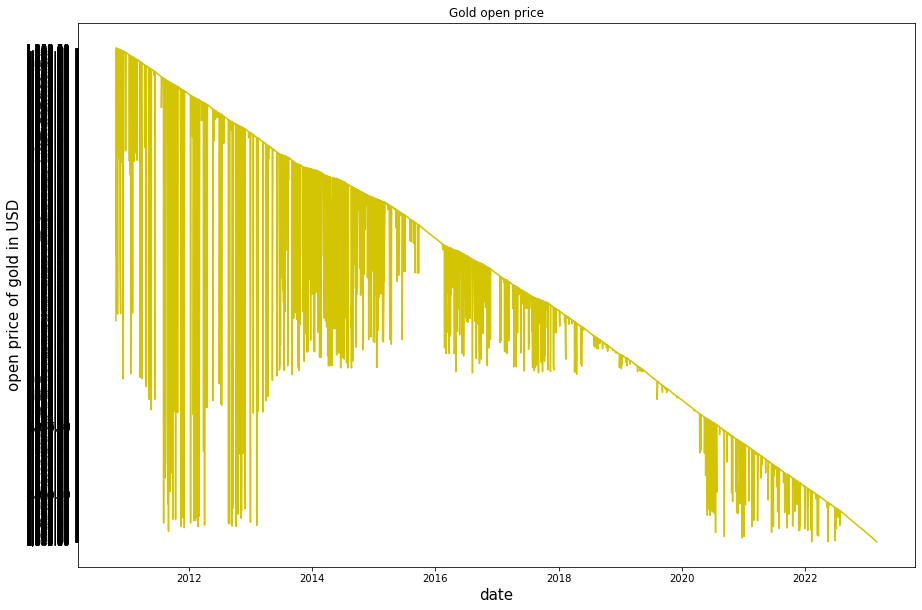

In [30]:
fig = plt.figure(figsize = (15, 10))

plt.plot(df["Date"], df["Open"], color = "#D3C404")
plt.title("Gold open price")
plt.xlabel("date", fontsize = 15)
plt.ylabel("open price of gold in USD", fontsize = 15)
plt.show()

In [50]:
data = df.filter(['Price'])

In [51]:
dataset = data.values

In [52]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
print("Training data length: ", training_data_len)

Training data length:  3037


In [53]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.78937046],
       [0.77554422],
       [0.78034909],
       ...,
       [0.26769955],
       [0.2833889 ],
       [0.28368308]])

In [54]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train, "\n")
        print(y_train)

[array([0.78937046, 0.77554422, 0.78034909, 0.771818  , 0.76024711,
       0.75392234, 0.74485193, 0.75426554, 0.76848402, 0.77750539,
       0.78535007, 0.78265346, 0.77544617, 0.7770151 , 0.76936654,
       0.78878211, 0.78672289, 0.79741126, 0.80074524, 0.81172779,
       0.80613846, 0.80074524, 0.79750932, 0.84987252, 0.86114924,
       0.86281624, 0.85634438, 0.86977839, 0.87075897, 0.88321239,
       0.87615219, 0.86938615, 0.86154148, 0.85732497, 0.84075309,
       0.84094921, 0.84359678, 0.85340263, 0.85516768, 0.8327123 ,
       0.81319867, 0.81084526, 0.81212002, 0.80417729, 0.77564228,
       0.79368504, 0.7810355 , 0.77093548, 0.76152187, 0.76132575,
       0.75132379, 0.75848206, 0.74534222, 0.73994901, 0.73122181,
       0.7607374 , 0.7607374 , 0.73357521, 0.73602667, 0.72386742])] 

[0.7541674838203569]
[array([0.78937046, 0.77554422, 0.78034909, 0.771818  , 0.76024711,
       0.75392234, 0.74485193, 0.75426554, 0.76848402, 0.77750539,
       0.78535007, 0.78265346, 0.77

In [55]:
df.rename(columns = {"Date" : "date", "Open" : "open", "High" : "high", "Low" : "low",
                     "Close" : "close", "Volume" : "volume", "Currency" : "currency"}, inplace = True)

In [56]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [57]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("The sape of x_train set:", x_train.shape)


The sape of x_train set: (2977, 60, 1)


In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2977/2977 [==============================] - 43s 14ms/step - loss: 0.0016


In [59]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [60]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [61]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions[0:10]

5/5 [==============================] - 1s 16ms/step


array([[1539.5895],
       [1544.395 ],
       [1545.0647],
       [1540.2513],
       [1539.4794],
       [1537.4976],
       [1535.9514],
       [1535.35  ],
       [1529.6748],
       [1526.2295]], dtype=float32)

# RMSE of 16.0011 using LSTM

In [62]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE score of the model:", rmse)

RMSE score of the model: 16.001134374996564


In [65]:
train

,Price
0,1854.6
1,1840.5
2,1845.4
3,1836.7
4,1824.9
...,...
3032,1515.6
3033,1529.2
3034,1542.7
3035,1538.7


C:\Users\risha\AppData\Local\Temp\ipykernel_20144\532327292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


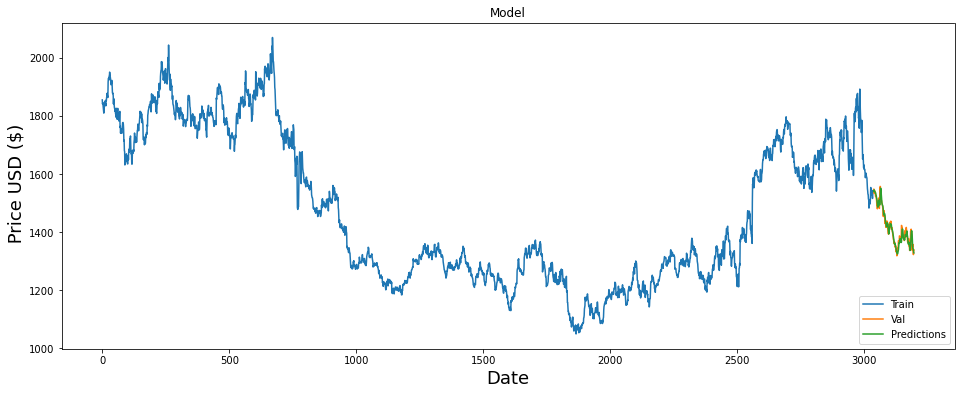

In [75]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel(' Price USD ($)', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
# plt.plot(df['date'])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()


In [71]:
df

,date,Price,open,high,low,volume,Chg%
0,2023-03-03,1854.6,1842.1,1864.4,1842.0,0.0,0.77%
1,2023-03-02,1840.5,1843.8,1845.3,1835.9,0.0,-0.27%
2,2023-03-01,1845.4,1834.0,1852.5,1829.6,182580.0,0.47%
3,2023-02-28,1836.7,1823.9,1838.6,1810.8,184510.0,0.65%
4,2023-02-27,1824.9,1818.0,1827.3,1812.0,130430.0,0.35%
...,...,...,...,...,...,...,...
3191,2010-10-29,1357.6,1344.5,1359.8,1335.2,167820.0,1.12%
3192,2010-10-28,1342.5,1325.3,1346.2,1322.9,148660.0,1.50%
3193,2010-10-27,1322.6,1340.4,1343.7,1318.6,160010.0,-1.20%
3194,2010-10-26,1338.6,1340.3,1343.8,1328.1,156540.0,-0.02%


In [76]:
valid

,Price,Predictions
3037,1547.2,1539.589478
3038,1542.4,1544.395020
3039,1532.7,1545.064697
3040,1543.2,1540.251343
3041,1536.8,1539.479370
...,...,...
3191,1357.6,1341.898926
3192,1342.5,1341.525024
3193,1322.6,1339.079834
3194,1338.6,1330.147583


In [77]:
df.iloc[3037]

date      2011-06-06 00:00:00
Price                  1547.2
open                   1544.5
high                   1555.0
low                    1541.6
volume               100190.0
Chg%                    0.31%
Name: 3037, dtype: object